In [72]:

import json
import numpy as np
import sklearn.model_selection
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

# 读取label2id字典
with open("./vocab/sent_vocab.json", "r", encoding="utf-8") as f:
    entry = json.load(f)
word2idx = entry['word2id']
id2wordObj = entry['id2wordObj']

with open("./vocab/tag_vocab.json", "r", encoding="utf-8") as f:
    entry = json.load(f)
tag2idx = entry['tag2id']
id2tagObj = entry['id2tagObj']

MAX_SEQ_LEN = 128


# 将原始样本数据做初步处理
def read_data(file_path):
    # 读取数据集
    with open(file_path, "r", encoding="utf-8") as f:
        content = [line.strip() for line in f.readlines()]

    #根据空行判断每个句子的分割点，找出分割点存在index列表里
    index = [-1]
    #空行代表是一个句子的分割，一般行都是"相 O"形式，里面有一个空格；而空行只是一个""，没有空格
    index.extend([i for i, _ in enumerate(content) if ' ' not in _])
    index.append(len(content))
  
    # 根据上述找好的每句话分割点的index位置，一句一句找出word和对应的tag
    sentences, tags = [], []
    for j in range(len(index)-1):
        word, tag = [], []
        #一个sentence就代表一句话
        sentence = content[index[j]+1: index[j+1]]
        for line in sentence:
            word.append(line.split()[0])
            tag.append(line.split()[-1])
        #句子原文用字符串形式连在一起
        sentences.append(''.join(word))
        #一句话的所有tag组成一个list，最后再统一放到大的tags列表里
        tags.append(tag)

    # 去除空的句子及标注序列，一般放在末尾
    sentences = [s for s in sentences if s]
    tags = [t for t in tags if t]

    return sentences, tags

sentences, tags = read_data('./entity.txt')

X = [[word2idx[w] for w in sentence] for sentence in sentences]
y = [[tag2idx[t] for t in tag] for tag in tags]

# 最大长度为特征维度
MAX_SEQ_LEN = max([len(x) for x in X])

X = pad_sequences(maxlen=MAX_SEQ_LEN, sequences=X, padding="post", value=0)
y = pad_sequences(maxlen=MAX_SEQ_LEN, sequences=y, padding="post", value=tag2idx["O"])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
print(X)
print(y)
print(len(X), len(X[0]))
print(len(y), len(y[0]))
print(X_train, X_test, y_train, y_test)

[[1984 4085  125 ...    0    0    0]
 [  80  226   69 ...    0    0    0]
 [1164  526 1052 ...    0    0    0]
 ...
 [  80    5  233 ...    0    0    0]
 [  44   93  110 ...    0    0    0]
 [ 284 1147    0 ...    0    0    0]]
[[1 2 2 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [4 5 5 ... 3 3 3]
 ...
 [4 5 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
48 182
48 182
[[  33   93   33 ...    0    0    0]
 [1984 4085  125 ...    0    0    0]
 [  33   19   33 ...    0    0    0]
 ...
 [  80  226   69 ...    0    0    0]
 [ 284  718  227 ...    0    0    0]
 [  16   19   93 ...    0    0    0]] [[ 444  284   35   57  259   75  123  102  203    0   16   16   93   44
    35    0   80    5    7 1164  526 1052    7   35   57   13  718    5
   277   36   10   24  233   25  245  464   98   30 4088 2101 2209 2675
  2209 1993 2715 2209 3743 4089   23  227   98  614  431    1 1003   74
  1092  318    4 1164  526 1052  233  226 1062  245   72  225  687  415
   931  193  573  617    0  374    5  112 1102  13

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 182)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_13 (Embedding)        │ (None, 182, 14)        │        63,756 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 182, 28)        │         3,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 182, 13)        │           377 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,381 (263.21 KB)

 Trainable params: 67,381 (263.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.2767 - loss: 2.5108 - val_accuracy: 0.9524 - val_loss: 2.2228
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9064 - loss: 2.2067 - val_accuracy: 0.9524 - val_loss: 1.8598
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9221 - loss: 1.8918 - val_accuracy: 0.9524 - val_loss: 1.5252
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9138 - loss: 1.6350 - val_accuracy: 0.9524 - val_loss: 1.2485
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9215 - loss: 1.3522 - val_accuracy: 0.9524 - val_loss: 1.0211
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9094 - loss: 1.1728 - val_accuracy: 0.9524 - val_loss: 0.8383
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9114 - loss: 1.0138 - val_accuracy: 0.9524 - val_loss: 0.6929
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9165 - loss: 0.8557 - val_accuracy: 0.9524 - val_loss

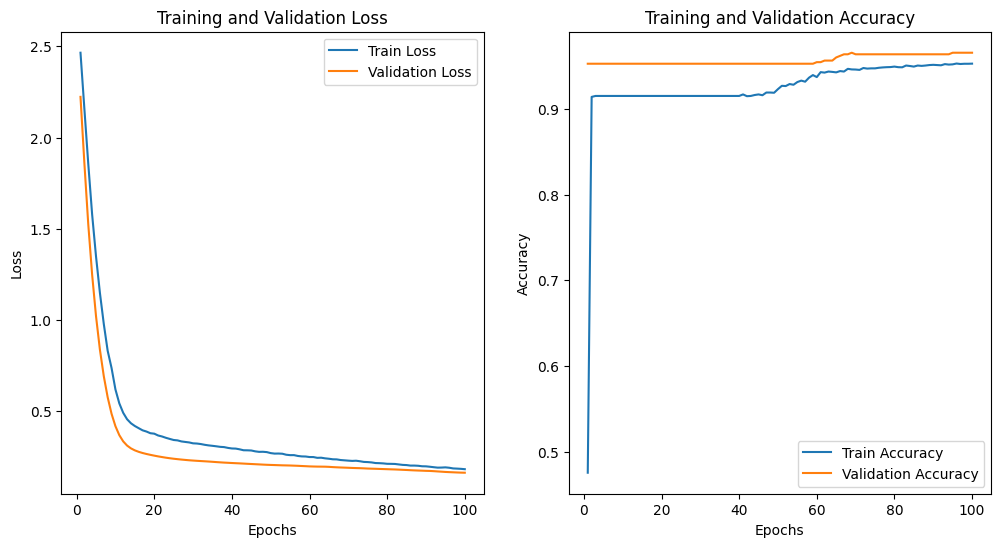

In [27]:
import tensorflow as tf
import time
from keras import Input, Model
from keras_contrib.layers import CRF
from keras.layers import Dense, Activation, Dropout, LSTM, GRU, Embedding, Bidirectional, TimeDistributed, Reshape
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
from keras import Model, Input


def build_model(max_features, max_sentence_len, num_tag, embedding_size, hidden_size):
    print(max_features, max_sentence_len, num_tag, embedding_size, hidden_size)
    model = Sequential()
    model.add(Embedding(max_features, embedding_size, input_length=max_sentence_len))
    model.add(Bidirectional(LSTM(hidden_size, return_sequences=True, recurrent_dropout=0.1)))
    model.add(TimeDistributed(Dense(hidden_size, activation="relu")))
    # crf_layer = CRF(num_tag, sparse_target=True)
    # model.add(crf_layer)
    # model.compile(loss=crf_layer.loss_function, optimizer='adam', metrics=[crf_layer.accuracy])
    # model.add(Reshape((-1,)))
    model.add(Dense(num_tag, activation="softmax"))  # 输出层大小等于标签的数量

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Build model
# Build model
def build_model2(max_sentence_len, n_tags):
    # Bert Embeddings
    inputs = Input(name='inputs',shape=[max_sentence_len])
    ## Embedding(词汇表大小,batch大小,每个新闻的词长)
    layer = Embedding(max_sentence_len+1,max_sentence_len,input_shape=max_sentence_len)(inputs)
    # LSTM model
    lstm = LSTM(max_sentence_len, return_sequences=True)(layer)
    drop = Dropout(0.1, name="dropout")(lstm)
    dense = TimeDistributed(Dense(n_tags, activation="softmax"), name="time_distributed")(drop)
    # crf = CRF(n_tags)
    # out = crf(dense)
    model = Model(inputs=inputs, outputs=dense)
    # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 模型结构总结
    model.summary()
    #plot_model(model, to_file="albert_bi_lstm.png", show_shapes=True)

    return model

def build_bilstm_ner_model(max_seq_length, num_words, num_tags, embedding_dim, lstm_units):
    # Input layer
    input_layer = Input(shape=(max_seq_length,))
    
    # Embedding layer
    embedding_layer = Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_seq_length)(input_layer)
    
    # Bidirectional LSTM layer
    bilstm_layer = Bidirectional(LSTM(units=lstm_units, return_sequences=True, recurrent_dropout=0.1))(embedding_layer)
    
    # TimeDistributed layer for output
    output_layer = TimeDistributed(Dense(num_tags, activation='softmax'))(bilstm_layer)
    
    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

def train():
    embedding_size = 14
    hidden_size = 14
    # model = build_model(len(word2idx), MAX_SEQ_LEN, len(tag2idx), embedding_size, hidden_size)
    # model = build_model2(MAX_SEQ_LEN, len(tag2idx))
    model = build_bilstm_ner_model(MAX_SEQ_LEN, len(word2idx), len(tag2idx), embedding_size, hidden_size)

    model.summary()
    BATCH_SIZE=10 # 训练很慢，所以提高批次大小
    EPOCHS=100 # 训练代数
    history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.05)
    model.save(f"model/model.keras")
    return history


history = train()

# 获取训练过程中的损失值和准确度
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# 绘制损失函数曲线
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 绘制准确度曲线
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Train Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## 测试

In [28]:
# model = load_model('model/model20240514-153307.keras')
model = load_model('model/model.keras')
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9352 - loss: 0.2197
test loss, test acc: [0.21970057487487793, 0.9351648092269897]


## 预测

In [91]:
# 将原始样本数据做初步处理
def get_predict_data(file_path):
    # 读取数据集
    with open(file_path, "r", encoding="utf-8") as f:
        sentences = [line.strip() for line in f.readlines()]
        return sentences
# 从预测的标签列表中获取实体
def extract_entities(tags, words):
    entities = []
    current_entity = None

    for tag, word in zip(tags, words):
        if tag.startswith('I-'):
            if current_entity is not None:
                current_entity += ' ' + word
            else:
                current_entity = word
        elif tag.startswith('B-'):
            if current_entity is not None:
                entities.append(current_entity)
            current_entity = word
        else:
            if current_entity is not None:
                entities.append(current_entity)
                current_entity = None
    if current_entity is not None:
        entities.append(current_entity)

    return entities

sentences = get_predict_data('./predict.txt')

X = [[word2idx[w] for w in sentence] for sentence in sentences]
predict_data = pad_sequences(maxlen=MAX_SEQ_LEN, sequences=X, padding="post", value=0)
result = np.argmax(model.predict(predict_data), axis=2)


words = [[id2wordObj[str(w)] for w in sentence] for sentence in predict_data]
bio = [[id2tagObj[str(w)] for w in sentence] for sentence in result]
print(bio[4], words[4])

for index in range(len(words)):
    # print(words[index], bio[index])
    print(extract_entities(bio[index], words[index]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
['I-WEAPON', 'I-WEAPON', 'I-WEAPON', 'I-WEAPON', 'I-WEAPON', 'I-WEAPON', 'I-WEAPON', 'I-WEAPON', 'O', 'O', 'O', 'O', 'O', 'O', 'I-WEAPON', 'I-WEAPON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '